a=100trials-fixed_seed
b=e_nfs
c=r_nfs


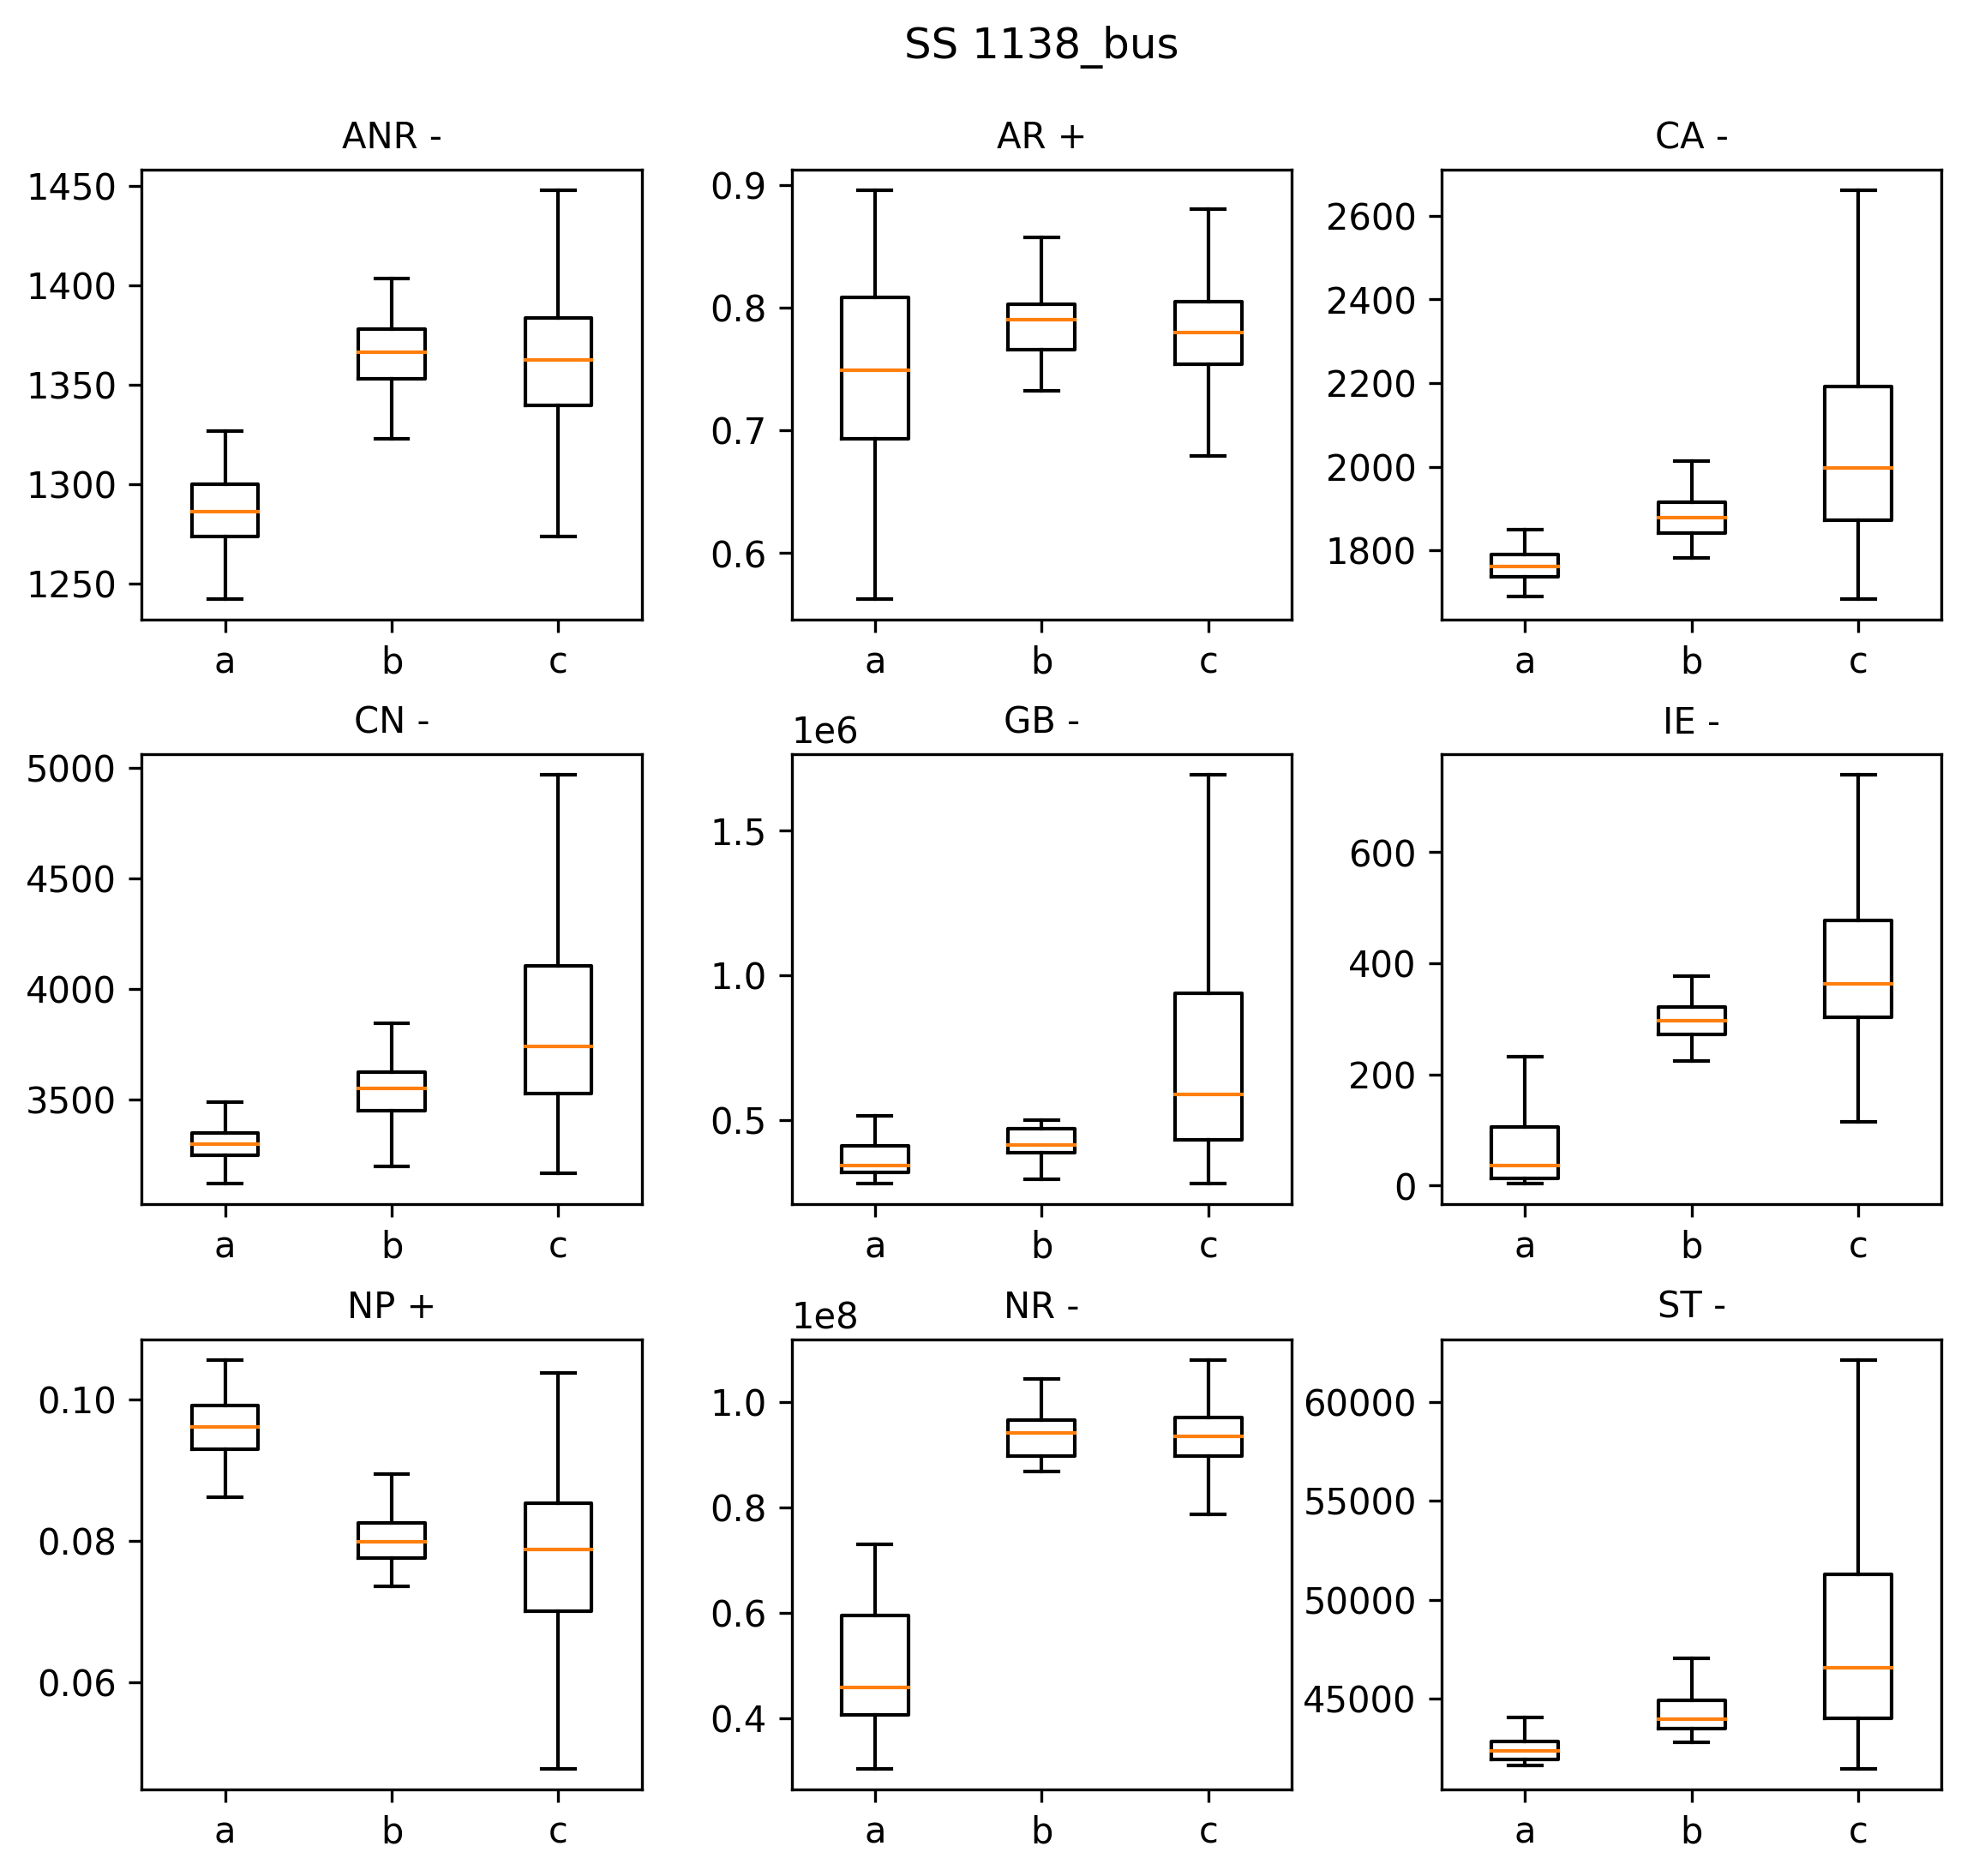

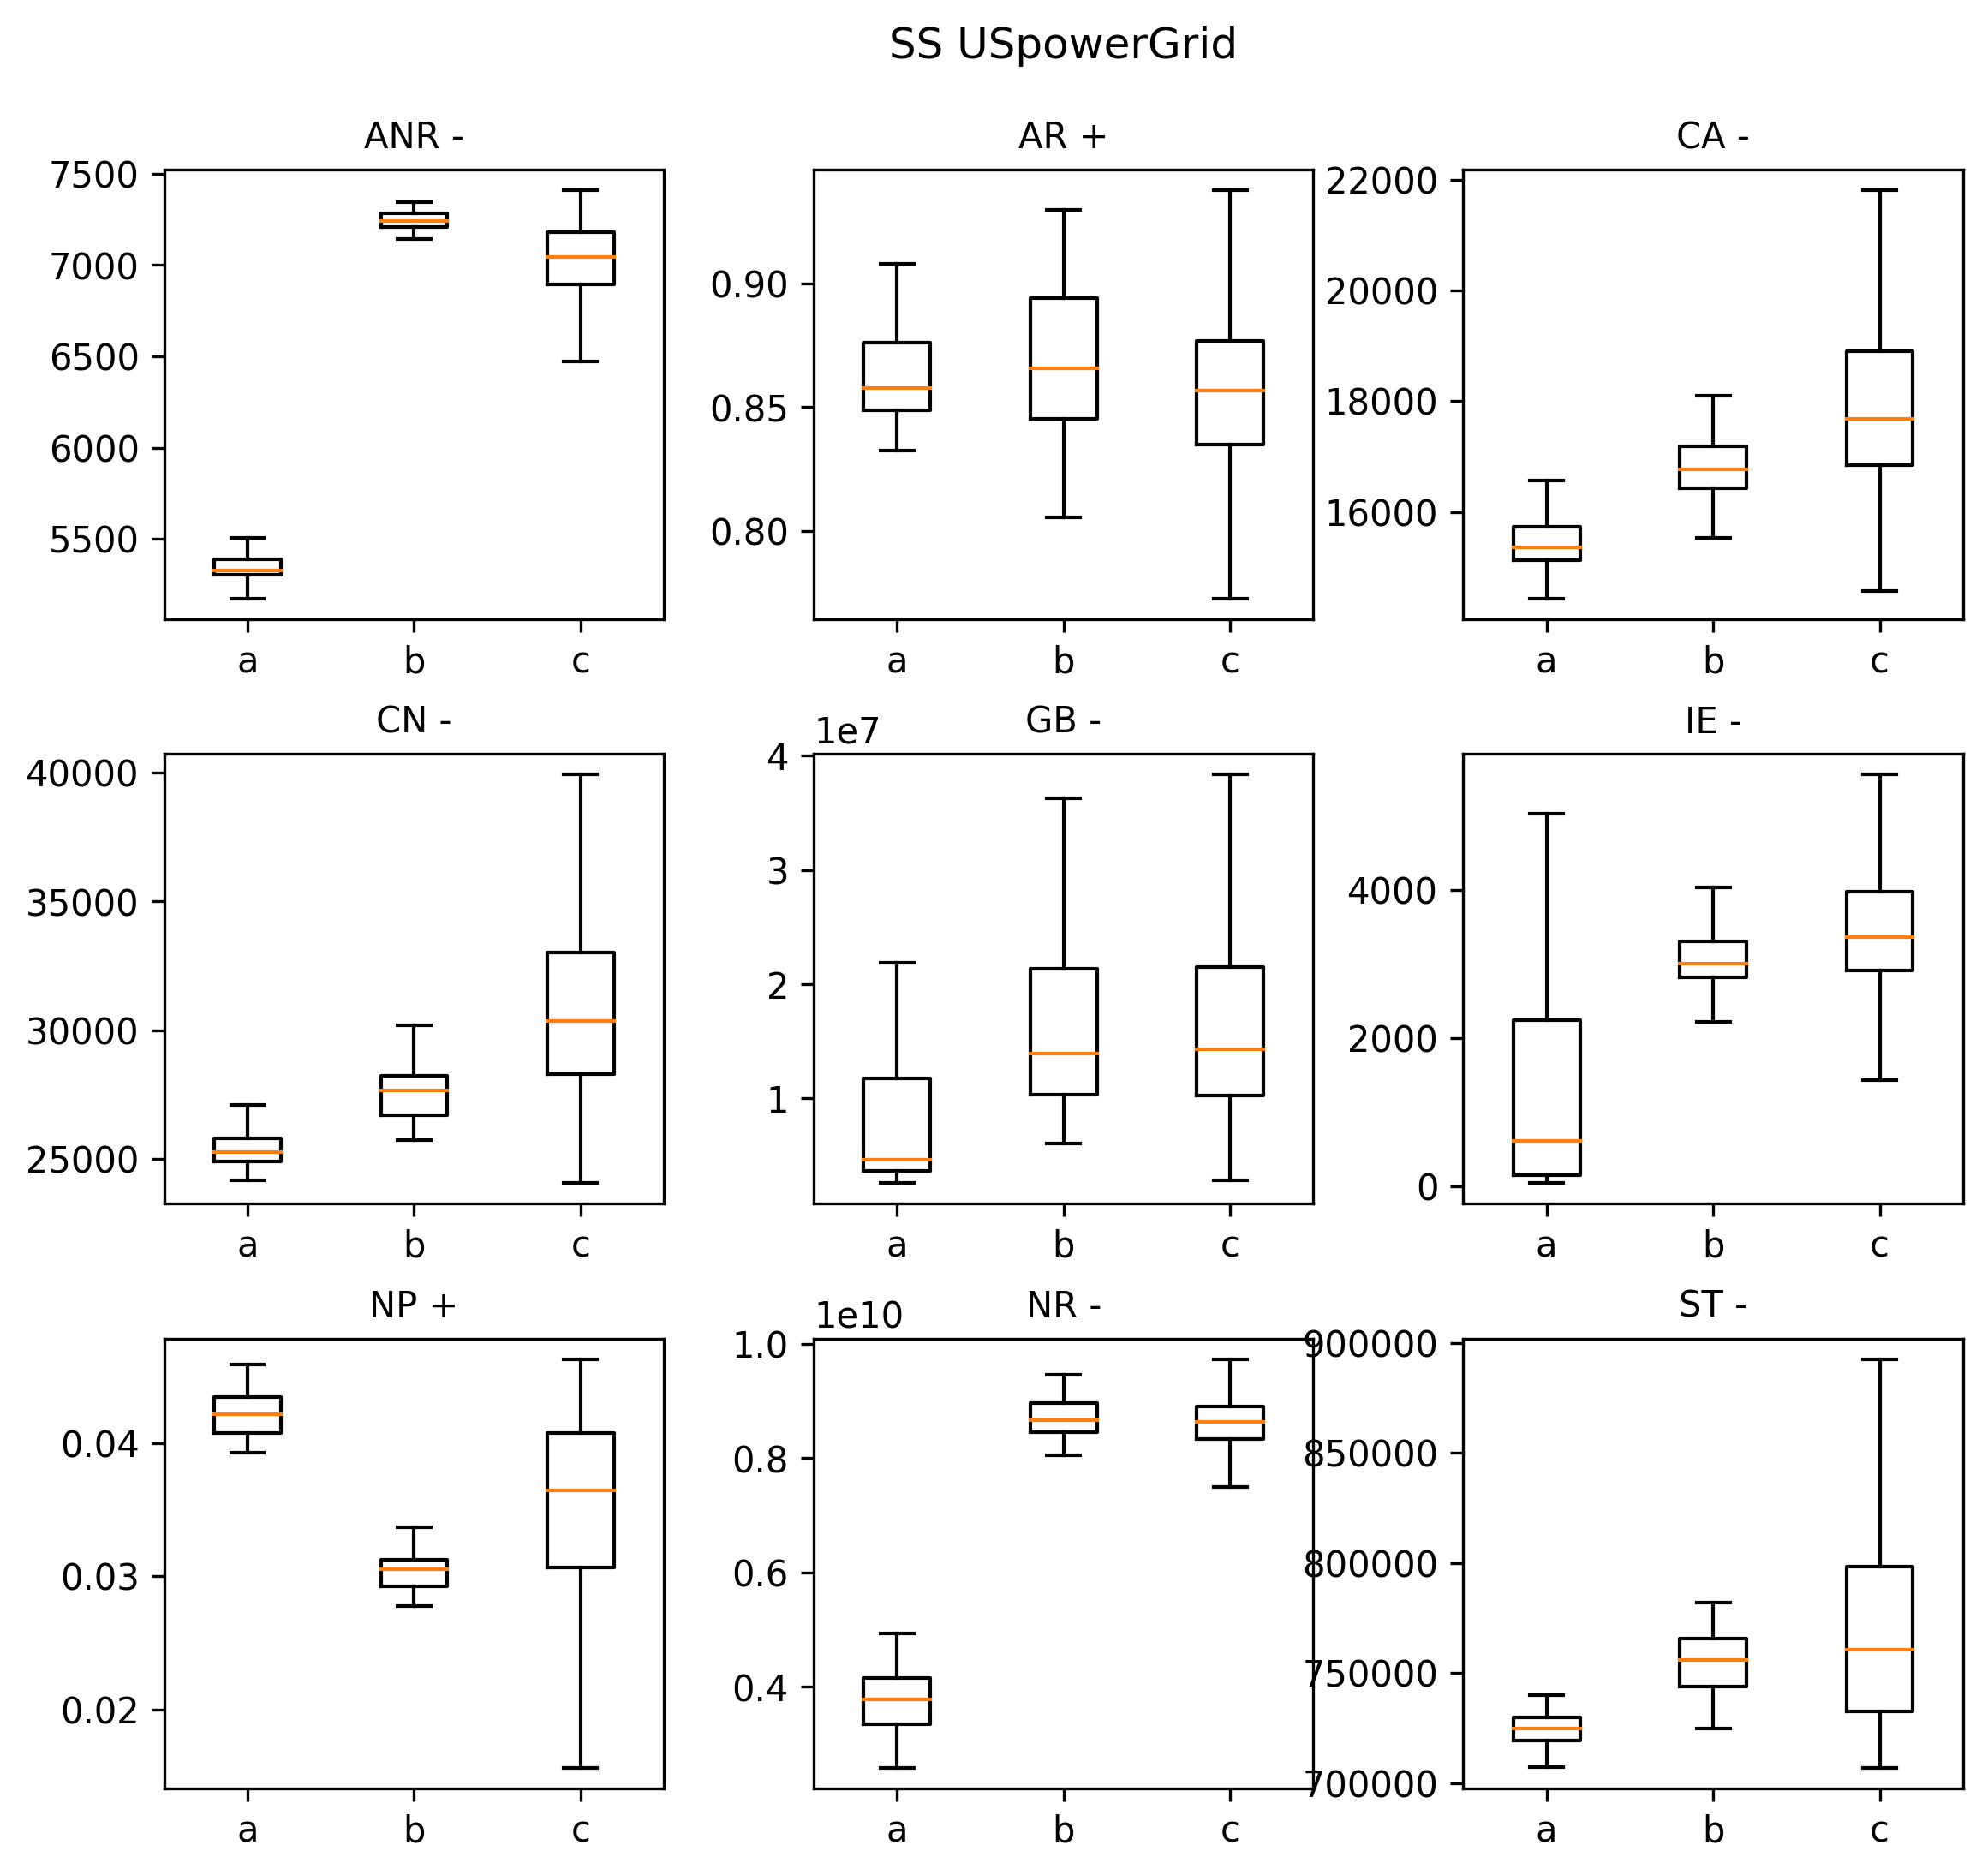

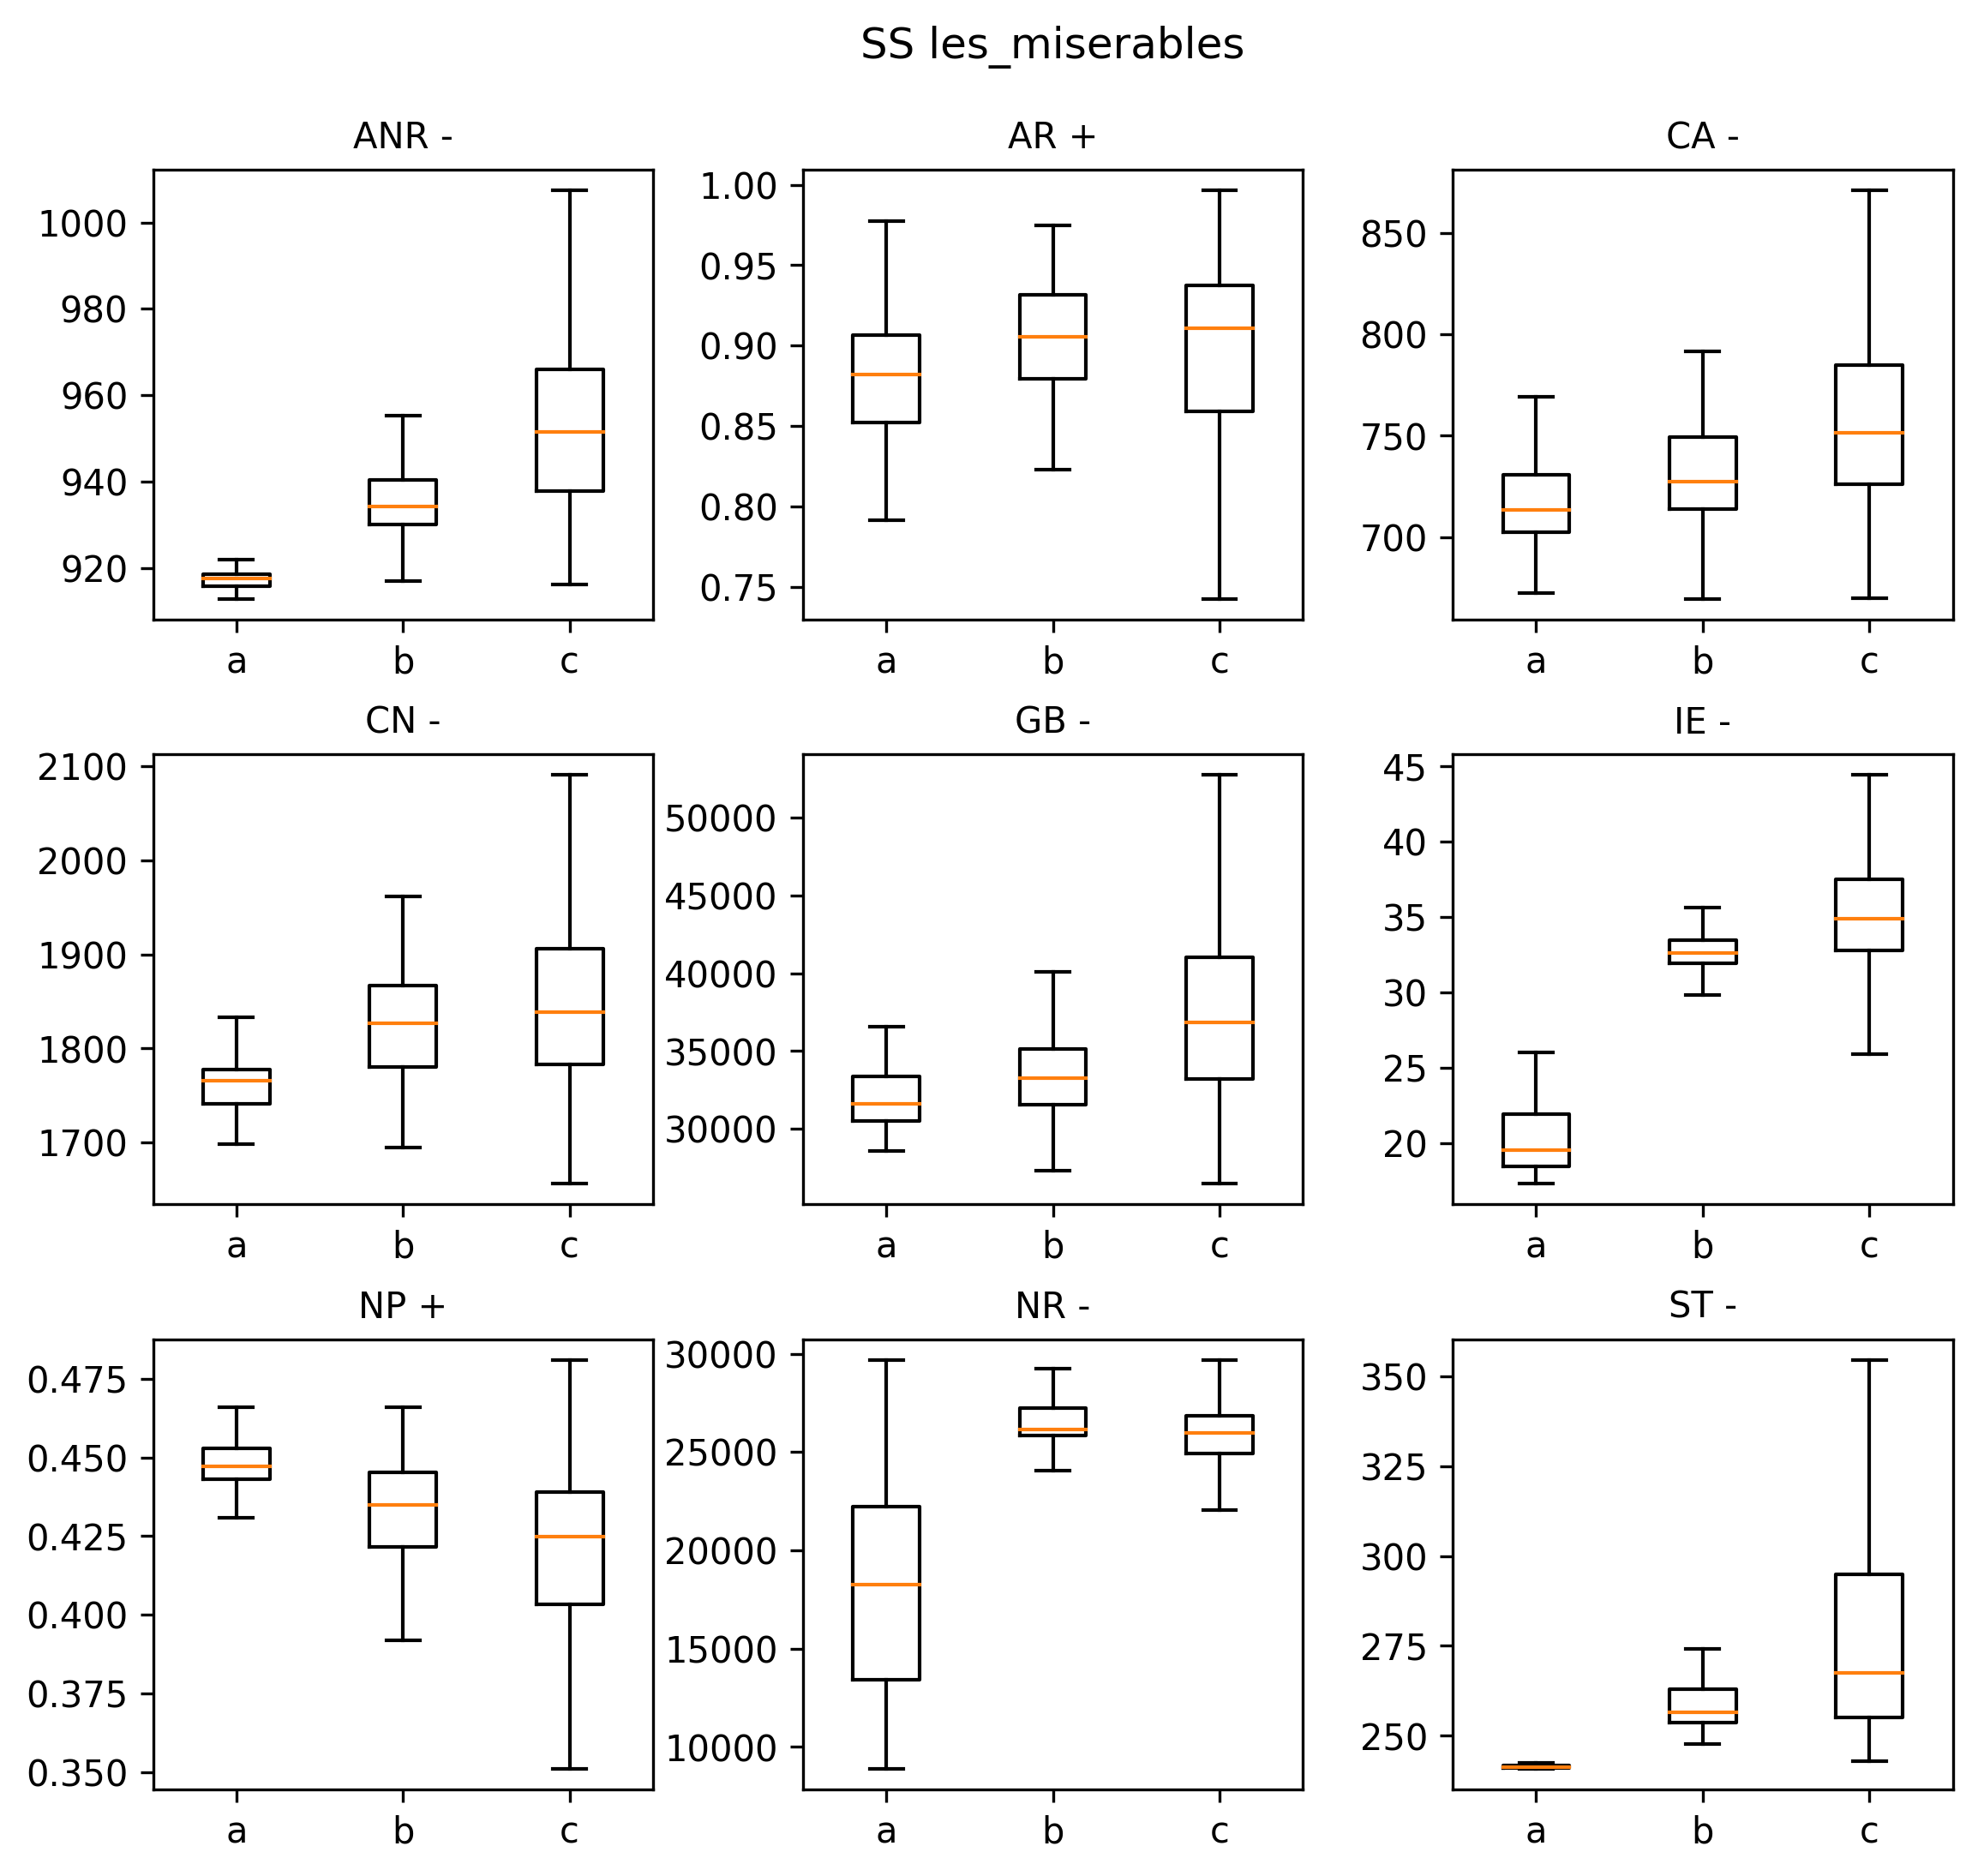

In [12]:
%matplotlib inline
from config import dataset, layout, paths, quality_metrics
import pandas as pd
import matplotlib.pyplot as plt


DB_STEMS = [
    "100trials-fixed_seed",
    # "100trials-non_fixed_seed",
    # "100trials-5mean-non_fixed_seed",
    # "100trials-5median-non_fixed_seed",
]

UUID = "25a73bb2-ae88-4b4a-9f14-0acf4ee3b624"

NAME_ABBREVIATIONS = {
    "angular_resolution": "ANR",
    "aspect_ratio": "AR",
    "crossing_angle": "CA",
    "crossing_number": "CN",
    "gabriel_graph_property": "GB",
    "ideal_edge_lengths": "IE",
    "node_resolution": "NR",
    "run_time": "RT",
    "neighborhood_preservation": "NP",
    "stress": "ST",
}

BOX_PLOT_WIDTH = 0.4

TEXT_SIZE = 10


def get_qualities_list(df):
    qualities_list = {}
    for qm_name in quality_metrics.ALL_QM_NAMES:
        qualities_list[qm_name] = []
    for row in df.itertuples():
        for qm_name in quality_metrics.ALL_QM_NAMES:
            qualities_list[qm_name].append(row.qualities[qm_name])

    return qualities_list

flag = True
for L in layout.LAYOUT_NAMES:
    for D in dataset.DATASET_NAMES:
        data_dir = paths.get_data_dir(layout_name=L, dataset_name=D, uuid=UUID)
        if not data_dir.exists():
            continue
        e_nfs_df = pd.read_pickle(
            paths.get_e_nfs_path(
                layout_name=L, dataset_name=D, filename="50nfs.pkl", uuid=UUID
            ).resolve()
        )
        r_nfs_df = pd.DataFrame()
        for i in range(4):
            df = pd.read_pickle(
                paths.get_r_nfs_path(
                    layout_name=L,
                    dataset_name=D,
                    filename=f"20rp-50nfs-{i}.pkl",
                    uuid=UUID,
                )
            )
            r_nfs_df = pd.concat([r_nfs_df, df])
        o_nfs_df = {}

        for db_stem in DB_STEMS:
            o_nfs_df[db_stem] = {}
            for qm_name in quality_metrics.ALL_QM_NAMES:
                o_nfs_path = paths.get_o_nfs_path(
                    layout_name=L,
                    dataset_name=D,
                    filename=f"op-50nfs-{qm_name}-{db_stem}.pkl",
                    uuid=UUID,
                )
                o_nfs_df[db_stem][qm_name] = pd.read_pickle(o_nfs_path)

        q_r_nfs = get_qualities_list(r_nfs_df)
        q_e_nfs = get_qualities_list(e_nfs_df)
        q_o_nfs_all = {}
        for db_stem in DB_STEMS:
            q_o_nfs_all[db_stem] = {}
            for qm_name in quality_metrics.ALL_QM_NAMES:
                q_o_nfs_all[db_stem][qm_name] = get_qualities_list(
                    o_nfs_df[db_stem][qm_name]
                )

        fig = plt.figure(dpi=300, facecolor="white", figsize=(7,7))
        fig.suptitle(f"{L} {D}")
        for i, qm_name in enumerate(quality_metrics.ALL_QM_NAMES):
            direction = quality_metrics.QUALITY_METRICS_MAP[qm_name].direction
            ax = fig.add_subplot(3, 3, i + 1)
            ax.tick_params(axis="x", labelsize=TEXT_SIZE)
            ax.tick_params(axis="y", labelsize=TEXT_SIZE)
            ax.set_title(
                f"{NAME_ABBREVIATIONS[qm_name]} {'+' if direction == 'maximize' else '-'}",
                fontsize=TEXT_SIZE,
            )
            bins = []
            labels = []
            for db_stem in DB_STEMS:
                labels.append(db_stem)
                bins.append(q_o_nfs_all[db_stem][qm_name][qm_name])
            labels.append("e_nfs")
            bins.append(q_e_nfs[qm_name])
            labels.append("r_nfs")
            bins.append(q_r_nfs[qm_name])
            if flag:
                # for c, l in zip(['a', 'b', 'c', 'd', 'e', 'f'], labels):
                #     print(f"{c}={l}")
                for c, l in zip(['a', 'b', 'c'], labels):
                    print(f"{c}={l}")
                flag = False
            plt.subplots_adjust(left=0, top=0.9, bottom=0, right=1, wspace=0.3, hspace=0.3)
            ax.boxplot(
                bins,
                labels=['a', 'b', 'c'],
                # labels=['a', 'b', 'c', 'd', 'e', 'f'],
                widths=BOX_PLOT_WIDTH,
                sym="",
                # whis=float('inf')
            )


In [13]:
# import optuna
# from optuna.visualization import plot_contour

# %matplotlib inline
# from config import dataset, layout, paths, quality_metrics
# import pandas as pd
# import matplotlib.pyplot as plt
# from itertools import combinations_with_replacement


# UUID = "cd7c1537-2ebe-4434-9ead-f7b1a866815a"

# NAME_ABBREVIATIONS = {
#     "angular_resolution": "ANR",
#     "aspect_ratio": "AR",
#     "crossing_angle": "CA",
#     "crossing_number": "CN",
#     "gabriel_graph_property": "GB",
#     "ideal_edge_length": "IE",
#     "node_resolution": "NR",
#     "run_time": "RT",
#     "shape_based_metrics": "SB",
#     "stress": "ST",
# }

# BOX_PLOT_WIDTH = 0.4

# TEXT_SIZE = 10

# params = [
#     "number_of_pivots",
#     "number_of_iterations",
#     "eps",
# ]

# params_comb = combinations_with_replacement(params, 2)

# for L in layout.LAYOUT_NAMES:
#     for D in dataset.DATASET_NAMES:
#         data_dir = paths.get_data_dir(layout_name=L, dataset_name=D, uuid=UUID)
#         if not data_dir.exists():
#             continue

#         for db_stem in DB_STEMS:
#             optimization_path = paths.get_optimization_path(layout_name=L, dataset_name=D, filename=f"{db_stem}.sql", uuid=UUID)
#             for qm_name in quality_metrics.ALL_QM_NAMES:
#                 print(D, db_stem, f"{NAME_ABBREVIATIONS[qm_name]} {'+' if direction == 'maximize' else '-'}")
#                 study = optuna.load_study(
#                     storage=f"sqlite:///{optimization_path.resolve()}",
#                     study_name=qm_name
#                 )
#                 fig = plot_contour(study=study)
#                 fig.write_image(f"images/{D}/{db_stem}-{qm_name}.png")
#                 # for comb in params_comb:
#                 #     fig = plot_contour(study=study, params=comb)



In [14]:
from PIL import Image, ImageDraw, ImageFont


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


for D in dataset.DATASET_NAMES:
    data_dir = paths.get_data_dir(layout_name=L, dataset_name=D, uuid=UUID)
    if not data_dir.exists():
        continue
    for db_stem in DB_STEMS:
        dst_export_path = f"images/{D}/{db_stem}-all.png"
        images = []
        tmp = []
        for qm_name in quality_metrics.ALL_QM_NAMES:
            image_path = f"images/{D}/{db_stem}-{qm_name}.png"
            img = Image.open(image_path)
            draw = ImageDraw.Draw(img)

            width = img.width // 20
            height = img.height // 10
            font = ImageFont.truetype(font="Arial.ttf", size=width)
            draw.text(
                (width, height), f"{qm_name}", "black", font=font
            )

            tmp.append({"image": img})

            if len(tmp) == 3:
                images.append(tmp)
                tmp = []

        dst = None
        for v in images:
            h_dst = None
            for h in v:
                if h_dst is None:
                    h_dst = h["image"]
                    continue
                h_dst = get_concat_h(h_dst, h["image"])
            if dst is None:
                dst = h_dst
                continue
            dst = get_concat_v(dst, h_dst)
            # dst = h_dst

        dst.save(dst_export_path)

FileNotFoundError: [Errno 2] No such file or directory: 'images/1138_bus/100trials-fixed_seed-angular_resolution.png'

In [ ]:
# import pandas as pd

# pd.read_pickle('/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/data/SS/1138_bus/cd7c1537-2ebe-4434-9ead-f7b1a866815a/grid/20split-0.pkl')

,id,params_id,seed,params,qualities,pos
0,e4646fbe-2c35-4106-a89a-8bb7ddb6381d,31cffdea-9380-4494-98e8-062983ccca74,0,"{'edge_length': 30, 'number_of_pivots': 5, 'nu...","{'angular_resolution': 0.00028007221313022595,...","{'5': (-147.46755981445312, -181.9830017089843..."
0,b4cc7cd9-0d57-4479-9537-0220b86a6a30,416de818-152b-4569-bc81-702475d938f9,0,"{'edge_length': 30, 'number_of_pivots': 5, 'nu...","{'angular_resolution': 0.0013006718616760747, ...","{'5': (-157.32151794433594, -183.94140625), '1..."
0,baf4aead-e34f-4560-abae-9eba350f8a77,728558e0-c0aa-47be-9790-ac65a1390b08,0,"{'edge_length': 30, 'number_of_pivots': 5, 'nu...","{'angular_resolution': 0.0010506472228283287, ...","{'5': (-162.20245361328125, -178.4409637451172..."
0,bdca87ab-2b8b-470e-9c86-9f66ed453255,7289527a-119f-4725-bb4f-1f93207f9585,0,"{'edge_length': 30, 'number_of_pivots': 5, 'nu...","{'angular_resolution': 0.00010142019936868721,...","{'5': (-162.46852111816406, -177.5449676513672..."
0,693a4743-b4d4-41d7-9a95-df3296a87800,7821b255-70bf-471e-8c26-6569754ea1d4,0,"{'edge_length': 30, 'number_of_pivots': 5, 'nu...","{'angular_resolution': 0.00021064981374816099,...","{'5': (-160.4832763671875, -176.7058868408203)..."
...,...,...,...,...,...,...
0,a19c73b0-9ca6-49d4-a269-c7fe2e02d590,b886a5ab-3f82-41bb-9ac7-8c674e3b78f9,0,"{'edge_length': 30, 'number_of_pivots': 25, 'n...","{'angular_resolution': 0.00039752936481709784,...","{'5': (237.28955078125, -452.947265625), '1': ..."
0,6ac8e038-acba-40ba-b152-1d648180b042,6ca41739-ad6b-4877-b08a-5c4ec4b4c07b,0,"{'edge_length': 30, 'number_of_pivots': 25, 'n...","{'angular_resolution': 0.0002540074829538765, ...","{'5': (356.554931640625, -510.34124755859375),..."
0,edbb74fb-d7cc-4f1d-8560-ee094faab0fe,7bbe3855-495a-4288-9e52-a22cef37c1f3,0,"{'edge_length': 30, 'number_of_pivots': 25, 'n...","{'angular_resolution': 0.00047234850622310834,...","{'5': (245.0497283935547, -580.08349609375), '..."
0,d97c5793-b768-4972-a0ff-6d29109f2de0,fe032180-3b35-461e-9a18-b671c45a7231,0,"{'edge_length': 30, 'number_of_pivots': 25, 'n...","{'angular_resolution': 0.00020212814379379533,...","{'5': (281.849853515625, -342.5926818847656), ..."
